Загрузим классы библиотеки и другие необходимые компоненты

In [1]:
import lib.PolyDetector as pd
import lib.ObjectDetector as obd
import logging
import sys
import cv2

Создадим экземпляры классов библиотеки, настроим логгер

In [2]:
poly_detector = pd.PolyDetector()
object_detector = obd.ObjectDetector()

logging.basicConfig(level=logging.INFO)

poly_detector.set_logger(logging.getLogger('poly_detector'))
object_detector.set_logger(logging.getLogger('object_detector'))

Укажем путь к файлу

In [3]:
path = './7_1.jpg'
# path = './8_1.jpg'
# path = './12_1.jpg'

Распознаем на изображении лист А4 и многоугольник, сохраним полученные результаты

In [4]:
if not poly_detector.detect(path):
    exit(1)

poly_contour = poly_detector.get_poly_contour()
paper_contour = poly_detector.get_paper_contour()

INFO:poly_detector:Grayscale file read successfully
INFO:poly_detector:Detected 32676 contours in file
INFO:poly_detector:3894 contours left
INFO:poly_detector:Detected polygon and paper contours
INFO:poly_detector:Found 8 vertex in paper area
INFO:poly_detector:Found paper vertex
INFO:poly_detector:Found polygon vertex


Распознаем в нижней половине изображения предметы, сохраним результаты

In [5]:
if not object_detector.detect(path, poly_detector):
    exit(2)
    
objects_contours = object_detector.get_object_contours()

INFO:object_detector:Grayscale file read successfully
INFO:object_detector:Found 1 objects


Отобразим распознанные объекты

<function matplotlib.pyplot.show(close=None, block=None)>

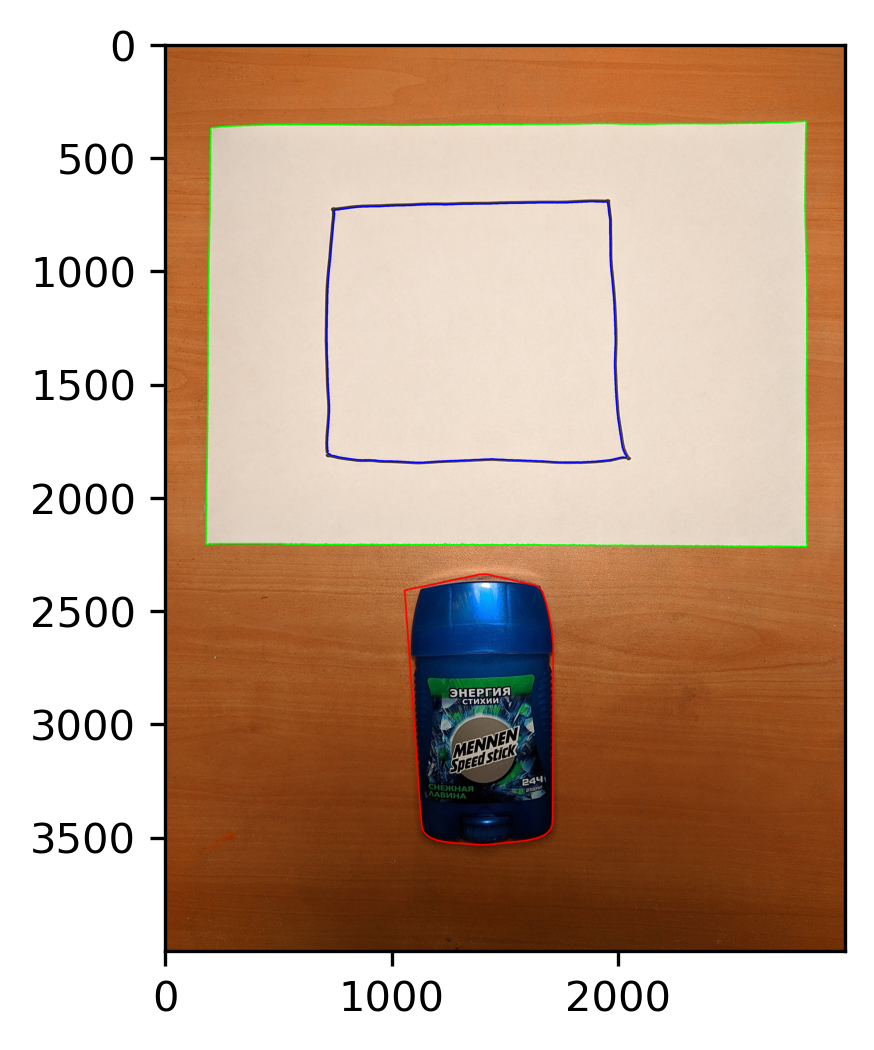

In [6]:
import matplotlib.pyplot as plt

img = cv2.imread(path)

cv2.drawContours(img, poly_contour, -1, (255, 0, 0), 5, cv2.LINE_AA)
cv2.drawContours(img, paper_contour, -1, (0, 255, 0), 5, cv2.LINE_AA)
cv2.drawContours(img, objects_contours, -1, (0, 0, 255), 5, cv2.LINE_AA)

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])

plt.figure(dpi=300)
plt.imshow(img)
plt.show